# Familiar EDA:  Red and Black Chinchompas #

## Practical Interest ##
From 18 Sept. 2020 to 25 Sept. 2020, black chinchompas fell by 266 gp. Across a 6 month period, I can see 7 total ~300 gp drops. I'd like to investigate if these dips happen regularly or can be predicted. 

As of now, my account is set up to hunt reds more efficiently (and safely). I think red chinchompas' price falls more frequently (thank black chinchompas), but in smaller quantities. I'd like to see if this claim is true.

In [1]:
from tradeable_item import TradeableItem
%matplotlib inline

In [2]:
#commodities of interest
redChins = TradeableItem("Red Chinchompa")
blkChins = TradeableItem("Black Chinchompa")

In [3]:
redChins.table.describe()

,Close,Average,Volume
count,179.000000,179.000000,1.790000e+02
mean,1353.715084,1400.715084,5.535762e+06
std,171.107340,189.147147,2.512031e+06
min,1079.000000,1206.000000,0.000000e+00
25%,1225.500000,1245.000000,4.024878e+06
50%,1304.000000,1303.000000,5.742112e+06
75%,1447.000000,1584.500000,6.953436e+06
max,1784.000000,1770.000000,1.345334e+07


/Users/nikourriola/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


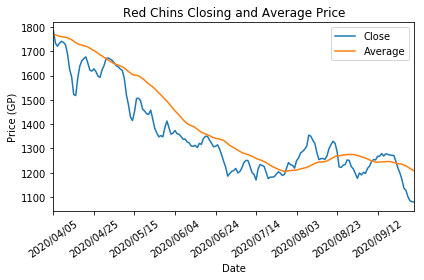

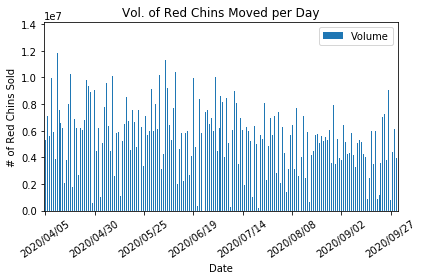

In [4]:
#visually verify that the data collected matches official OSRS GX listing
redChins.plot_time_series("Item Timestamps", ["Close", "Average"], "Red Chins Closing and Average Price", ylabel="Price (GP)", save_plot=False, verbose=True)
redChins.plot_bar_graph("Item Timestamps", ["Volume"], "Vol. of Red Chins Moved per Day", ylabel="# of Red Chins Sold", save_plot=False, verbose=True)

/Users/nikourriola/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


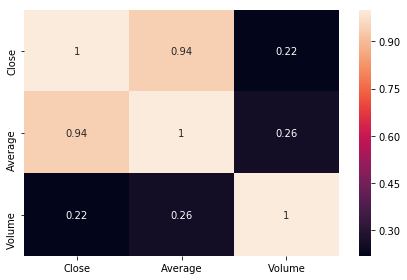

,Close,Average,Volume
Close,1.000000,0.939985,0.218296
Average,0.939985,1.000000,0.257482
Volume,0.218296,0.257482,1.000000


In [5]:
#check for possible correlations with these time series
redChins.correlation_matrix(["Close", "Average", "Volume"], " Red Chins Correlation Matrix", save=False, verbose=True)

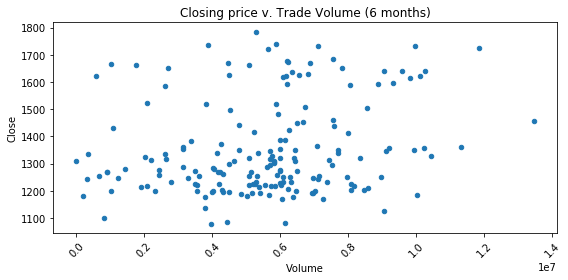

In [12]:
redChins.table.plot.scatter("Volume", "Close", rot=45, figsize=(8,4), title="Closing price v. Trade Volume (6 months)")

Although the correlation coefficient seems substantive, the trade volume is not the force behind closing price changes. I'm curious to know if the clustering seen in the scatter plot can be explained by trading pattern trends.

From a seller's POV a rapidly declining price might signal to me that I should cash out my supply of chins. In another case, it could be a sign to continue waiting for the price to move back up.

I specifically want to note what happened around Sept. 26th. The most units moved in that 30 day period happened on 26/09/20 which is also the tail end of a crash. The day after, it seemed like the number of units sold slowed the crash somewhat. Let's actaully put numbers to these observations with simple plots/calculations

Building off of this observation... 

**Question**:  What does the series look like per month?

In [13]:
#label each record with its month
months = {"01":"Jan",
"02":"Feb",
"03":"Mar",
"04":"Apr",
"05":"May",
"06":"Jun",
"07":"Jul",
"08":"Aug",
"09":"Sep",
"10":"Oct",
"11":"Nov",
"12":"Dec"}

rdf = redChins.table
rdf["Month"] = rdf["Timestamps"].apply(lambda x: x[5:7])
rdf["Month"] = rdf["Month"].apply(lambda x: months[x])

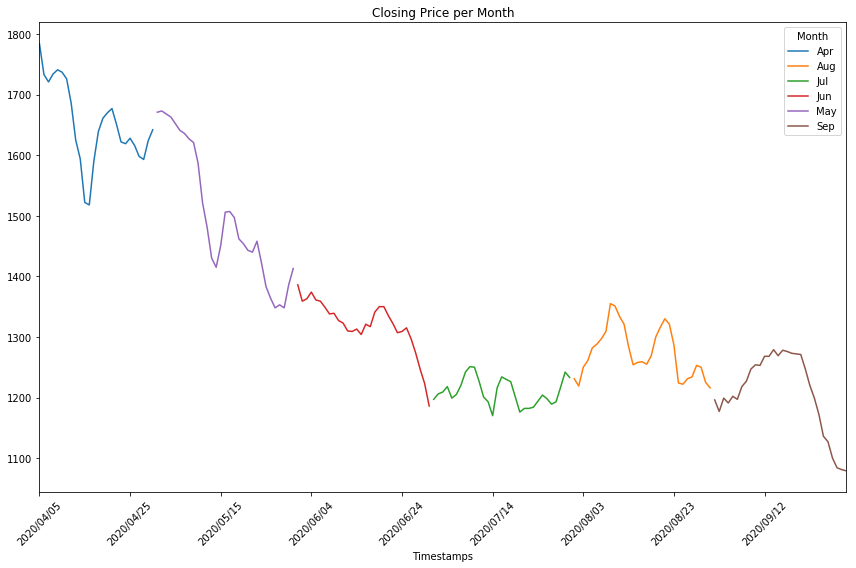

In [14]:
pvt = rdf.pivot(index="Timestamps", columns="Month", values=["Close", "Volume"])
pvt["Close"].plot(rot=45, figsize=(12,8), title="Closing Price per Month")

Each month looks like it can be characterized as having negative overall trend and 2 distinct price drops.
(*I'm calling this the "W" shape*)

What experiment can I make that would test the frequency of price drops per month; for the whole data set? 

*NB:  September looks like the first time in 6 months that only 1 major price drop occurred*

### September ###

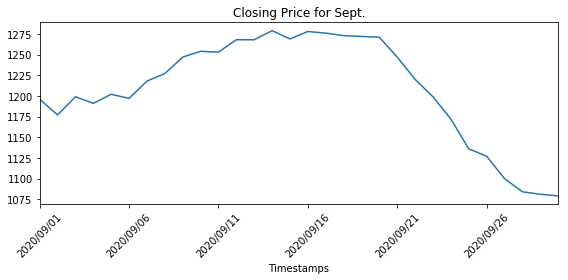

In [15]:
sepClose = pvt["Close"]["Sep"].dropna()
sepClose.plot(rot=45, figsize=(8,4), title="Closing Price for Sept.")

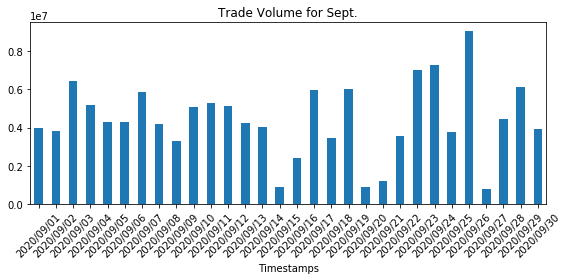

In [16]:
sepVol = pvt["Volume"]["Sep"].dropna()
sepVol.plot.bar(rot=45, figsize=(8,4), title="Trade Volume for Sept.")

In [18]:
import pandas as pd
sepDf = pd.DataFrame(data={"Close":sepClose, "Volume":sepVol})
sepDf.corr()

,Close,Volume
Close,1.000000,-0.207215
Volume,-0.207215,1.000000


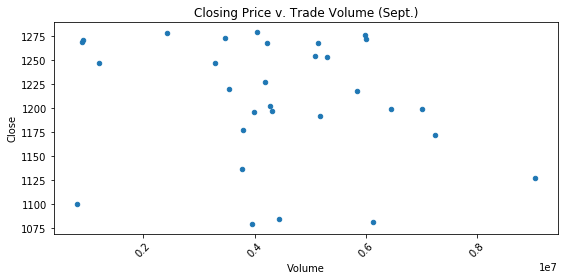

In [20]:
sepDf.plot.scatter("Volume", "Close", rot=45, figsize=(8,4), title="Closing Price v. Trade Volume (Sept.)")

Focusing on only September reveals that the correlation (close and volume) is equally as strong, but with a sign change.

## Differenced Closing Price ##

In [34]:
rdf["Differenced Close"].describe()

count    178.000000
mean      -3.960674
std       21.947642
min      -72.000000
25%      -15.750000
50%       -4.000000
75%        9.000000
max       72.000000
Name: Differenced Close, dtype: float64

#### Differenced Closing price histogram

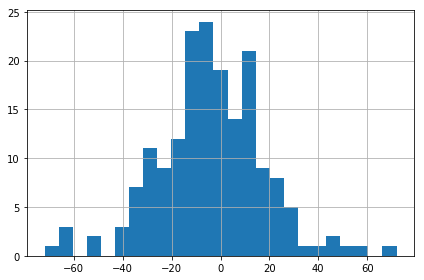

In [33]:
rdf["Differenced Close"] = rdf["Close"].diff()
rdf["Differenced Close"].hist(bins=25)

The distribution of price differences is slightly biased toward negative values (falls), explaining the overall decreasing trend.